# **Indian Population analysis and Prediction**

*A simple linear regression model based on more than 50 years of population record to predict next year's population.*

Machine Learning has become one of the trendy topics in recent times. There is a lot of development and research going on to keep this field moving forward. In this article, I will demonstrate a simple linear regression model that will predict a country’s population in the upcoming years.

Loading all the dependencies

In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plot
import seaborn as sns
import re
import json

import warnings
warnings.filterwarnings("ignore")

# **For Dataset 1**

In [ ]:
df = pd.read_csv('pop.csv')
df.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Aruba,ABW,"Population, total",SP.POP.TOTL,54208.0,55434.0,56234.0,56699.0,57029.0,57357.0,...,102050.0,102565.0,103165.0,103776.0,104339.0,104865.0,105361.0,105846.0,106310.0,106766.0
1,Africa Eastern and Southern,AFE,"Population, total",SP.POP.TOTL,130836765.0,134159786.0,137614644.0,141202036.0,144920186.0,148769974.0,...,532760424.0,547482863.0,562601578.0,578075373.0,593871847.0,609978946.0,626392880.0,643090131.0,660046272.0,677243299.0
2,Afghanistan,AFG,"Population, total",SP.POP.TOTL,8996967.0,9169406.0,9351442.0,9543200.0,9744772.0,9956318.0,...,30117411.0,31161378.0,32269592.0,33370804.0,34413603.0,35383028.0,36296111.0,37171922.0,38041757.0,38928341.0
3,Africa Western and Central,AFW,"Population, total",SP.POP.TOTL,96396419.0,98407221.0,100506960.0,102691339.0,104953470.0,107289875.0,...,360285439.0,370243017.0,380437896.0,390882979.0,401586651.0,412551299.0,423769930.0,435229381.0,446911598.0,458803476.0
4,Angola,AGO,"Population, total",SP.POP.TOTL,5454938.0,5531451.0,5608499.0,5679409.0,5734995.0,5770573.0,...,24220660.0,25107925.0,26015786.0,26941773.0,27884380.0,28842482.0,29816769.0,30809787.0,31825299.0,32866268.0


It can be seen that a bit more preprocessing is needed before passing it to the linear regression model. There are few unnecessary columns like Indicator Code, Indicator Name, and others which are not needed for this project. before that, I wanted to select one country based on the Country Name column.

In [ ]:
bd=df.loc[df['Country Name']=='India']
bd.drop(['Country Name','Country Code','Indicator Name','Indicator Code'],axis=1,inplace=True)
bd = bd.T
bd.head()

,109
1960,450547675.0
1961,459642166.0
1962,469077191.0
1963,478825602.0
1964,488848139.0


Here I used .loc to select India and after selecting, I have dropped four columns, so then I have all the years as columns and population as rows. I transposed the dataframe so that I can have only two columns as year and population.

But the column name is not showing and instead of the population, it is showing 109. Also, the year is shown as an index. For the Autoregressive (AR) model if the year was shown as index it would have been fine. But for linear regression, I want year as a different column, not as an index. because 
# ***y = mx + c***

This is a simple linear regression formula where y would be the predicted or dependent variable, x would be the independent variable, m is the slope or coefficient and c is the intercept. In this project, x would be the year, y would be the predicted population. So, the following code will help me prepare the process and renaming the columns.

In [ ]:
bd.dropna(inplace=True)
bd=bd.reset_index().rename(columns={'index':'year',109:'population'})
bd.head()

,year,population
0,1960,450547675.0
1,1961,459642166.0
2,1962,469077191.0
3,1963,478825602.0
4,1964,488848139.0


Now I can use this dataframe to train the linear regression model and get the desired output.

In this block of code, I transformed my year and population as a 2D array which is required to use in LinearRegression. Then I simply called the model and fit x and y in the model. after that, I used model.predict() to predict the following result.

In [ ]:
x = bd.iloc[:, 0].values.reshape(-1, 1)
y = bd.iloc[:, 1].values.reshape(-1, 1)
model = LinearRegression().fit(x, y)
y_pred = model.predict([[2029]])
list(y_pred[0])

[1531093589.2198296]

This is a function which will store all the unique country name in a JSON file, this will help users to check whether the country is available and also if there is any spelling mistake. The function takes the raw dataframe as input parameter and renames the country_name column. After that, it will convert all the countries' names in lower case letters using a combination of .apply() and lambda function. Then, all unique country name was converted into the list and it was saved as country_list.json file. In the end, it returns lists and modified dataframe to the main function. I am giving the main function code again for more ease in reading.

In [ ]:
def country_list_gen(df):
    df.rename(columns={'Country Name':'country_name'},inplace=True)
    df['country_name'] = df['country_name'].apply(lambda row: row.lower())
    lists = df['country_name'].unique().tolist()
    with open('country_list.json','w', encoding='utf-8') as f:
        json.dump(lists, f, ensure_ascii=False,indent=4)
    return lists, df

Now, the returned list contains the available country name, so a simple if-else statement is executed. If the user-inputted country name is not available in lists or if there is a spelling mistake with my lists then it instructs users to look into the country_list.json file. But, if the name already matches then it will execute the following functions.

In [ ]:
def selecting_country(df,country):
    df = df.loc[df['country_name']==country]
    df.drop(['country_name','Country Code','Indicator Name','Indicator Code'],axis=1,inplace=True)
    df = df.T
    df.dropna(inplace=True)
    df = df.reset_index()
    return df
def prediction_model(df):
    x = df.iloc[:, 0].values.reshape(-1,1)
    y = df.iloc[:, 1].values.reshape(-1,1)
    model = LinearRegression().fit(x,y)
    return model
def prediction(model, year):
    return int(model.coef_[0][0] * year + model.intercept_[0])

selecting_country function takes the country name and filters the dataframe, after that it drops unnecessary fields, transpose and reset index of the dataframe and return it to the main function. The main function then calls the prediction_model and send the dataframe as a parameter. Here I didn’t care about renaming column name as I am converting them into a 2D array as x and y. After that called LinearRegression() and fit the model with x and y. Then the fitted model is sent to the main function. The main function then passes this model along with the year which was prompted by the user in prediction function. This prediction function simply takes the coefficient and intercept from the model and use ‘y=mx+c’ to derive the predicted population.

This code is the main function of my script. First, it takes the country name as input from users and converts it into a lower case string. After that, it will also take the year as input and convert it into an integer. Then the original CSV file was loaded in dataframe using pandas read_csv(). Then, it executes the following function.

In [ ]:
# Population prediction for 20292
'''
def main():
    country = input("Please input the country name: ").lower()
    year = int(input("Please input the year to predict: "))
    df = pd.read_csv('pop.csv')
    lists, df = country_list_gen(df)
    if country in lists:
        df = selecting_country(df, country)
        model = prediction_model(df)
        result = prediction(model,year)
        print(f"\n Result: {country.upper()} population according to Dataset 1 in {year} will be {result:,d}")
    else:
        print('kindly check country name spelling from country_list.json')
    
if __name__ == "__main__":
    main()
'''

'\ndef main():\n    country = input("Please input the country name: ").lower()\n    year = int(input("Please input the year to predict: "))\n    df = pd.read_csv(\'pop.csv\')\n    lists, df = country_list_gen(df)\n    if country in lists:\n        df = selecting_country(df, country)\n        model = prediction_model(df)\n        result = prediction(model,year)\n        print(f"\n Result: {country.upper()} population according to Dataset 1 in {year} will be {result:,d}")\n    else:\n        print(\'kindly check country name spelling from country_list.json\')\n    \nif __name__ == "__main__":\n    main()\n'

In [ ]:
year = bd['year'].tolist()
population = bd['population'].tolist()
#print(type(year))
#print(type(year[0]))
#print(year)
x = bd.iloc[:, 0].values.reshape(-1, 1)
y = bd.iloc[:, 1].values.reshape(-1, 1)

In [ ]:
# with Decision Tree regressor

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor()
regressor.fit(X_train, y_train)

y_pred_dtr = list() 
for i in range(len(year)):
  k = regressor.predict([[int(year[i])]])
  y_pred_dtr.append(k[0])

bd['Predicted(DecisionTree)'] = y_pred_dtr
bd.head()

,year,population,Predicted(DecisionTree)
0,1960,450547675.0,450547675.0
1,1961,459642166.0,459642166.0
2,1962,469077191.0,459642166.0
3,1963,478825602.0,478825602.0
4,1964,488848139.0,478825602.0


In [ ]:
# with Support Vector Regression

#from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVR

scaler = MinMaxScaler()
x = scaler.fit_transform(x)
y = scaler.fit_transform(y)

regressor = SVR(kernel = 'rbf', C=1,epsilon=10)
regressor.fit(x, y)

y_pred_svr = list()

for i in range(0,len(year)):
  k = regressor.predict([[int(year[i])]])
  k = (scaler.inverse_transform(k.reshape(-1, 1)))/2
  y_pred_svr.append(k[0][0])


bd['Predicted(SVR)'] = y_pred_svr
bd.head()

#y_pred = regressor.predict([[2029]])
#y_pred = sc_y.inverse_transform(y_pred.reshape(-1, 1)) 
#print(y_pred)

,year,population,Predicted(DecisionTree),Predicted(SVR)
0,1960,450547675.0,450547675.0,457638015.0
1,1961,459642166.0,459642166.0,457638015.0
2,1962,469077191.0,459642166.0,457638015.0
3,1963,478825602.0,478825602.0,457638015.0
4,1964,488848139.0,478825602.0,457638015.0


In [ ]:
# Preprocessing for Model scores -> List of Predicted Populations
#w.r.t Dataset 1

# https://medium.com/analytics-vidhya/predict-population-growth-using-linear-regression-machine-learning-d555b1ff8f38

model = LinearRegression().fit(x, y)

y_pred_regression = list()

for i in range(0,len(year)):
  k = model.predict([[int(year[i])]])
  y_pred_regression.append(k[0][0])
#print(y_pred)

bd['Predicted(Regression)'] = y_pred_regression
bd.head()

,year,population,Predicted(DecisionTree),Predicted(SVR),Predicted(Regression)
0,1960,450547675.0,450547675.0,457638015.0,2083.779781
1,1961,459642166.0,459642166.0,457638015.0,2084.842965
2,1962,469077191.0,459642166.0,457638015.0,2085.906148
3,1963,478825602.0,478825602.0,457638015.0,2086.969332
4,1964,488848139.0,478825602.0,457638015.0,2088.032515


In [ ]:
# univariate mlp example
from numpy import array
from keras.models import Sequential
from keras.layers import Dense
 
# split a univariate sequence into samples
def split_sequence(sequence, n_steps):
	X, y = list(), list()
	for i in range(len(sequence)):
		# find the end of this pattern
		end_ix = i + n_steps
		# check if we are beyond the sequence
		if end_ix > len(sequence)-1:
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
		X.append(seq_x)
		y.append(seq_y)
	return array(X), array(y)
 
# define input sequence
raw_seq = population
# choose a number of time steps
n_steps = 3
# split into samples
X, y = split_sequence(raw_seq, n_steps)

#to test model
size = int(len(population) * 0.66)
train_mlp, test_mlp = population[0:size], population[size:len(X)]
x1, y1 = split_sequence(train_mlp, n_steps)


# define model
model = Sequential()
model.add(Dense(100, activation='relu', input_dim=n_steps))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
test_mlp=list(test_mlp)

model.fit(x1, y1, epochs=2000, verbose=0)
ypred=list()
ypred.append(test_mlp[0])
ypred.append(test_mlp[1])
ypred.append(test_mlp[2])
for i in range(3,len(test_mlp)):
  a = test_mlp[i-3]
  b = test_mlp[i-2]
  c = test_mlp[i-1]
  x_input = array([a,b,c])
  x_input = x_input.reshape((1, n_steps))
  n = model.predict(x_input, verbose=0)
  ypred.append(n[0][0])  



# fit model
model.fit(X, y, epochs=2000, verbose=0)
# demonstrate prediction

#x_input = array([1352642283, 1366417756, 1380004385])
#x_input = x_input.reshape((1, n_steps))
#yhat = model.predict(x_input, verbose=0)
#print(yhat[0][0])


In [ ]:
pop = bd['population'].tolist()
yr =  bd['year'].tolist()
y  = 2020
for i in range(0,100):
  n = len(pop)
  a = pop[n-1]
  b = pop[n-2]
  c = pop[n-3]
  x_input = array([a,b,c])
  x_input = x_input.reshape((1, n_steps))
  yhat = model.predict(x_input, verbose=0)
  pop.append(yhat[0][0])
  y=y+1
  yr.append(y)

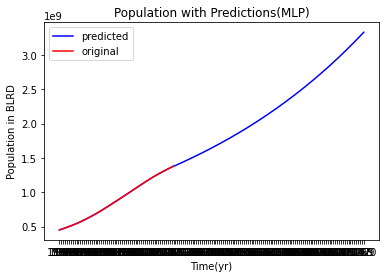

In [ ]:
plot.plot(yr, pop, color='b', label='predicted')
plot.plot(year, population, color='r', label='original')

# Naming the x-axis, y-axis and the whole graph
plot.xlabel("Time(yr)")
plot.ylabel("Population in BLRD")
plot.title("Population with Predictions(MLP)")
  
# Adding legend, which helps us recognize the curve according to it's color
plot.legend()
  
# To load the display window
plot.show()

In [ ]:
# evaluate an ARIMA model using a walk-forward validation
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot
#!pip install statsmodel
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt
import warnings
warnings.filterwarnings("ignore")
# load dataset
def parser(x):
	return datetime.strptime('190'+x, '%Y-%m')
#series = read_csv('shampoo-sales.csv', header=0, index_col=0, parse_dates=True, squeeze=True, date_parser=parser)
#series.index = series.index.to_period('M')
# split into train and test sets
#X = series.values
X = bd['population'].tolist()
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
# walk-forward validation
for t in range(len(test)):
	model = ARIMA(history, order=(5,1,0))
	model_fit = model.fit()
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))
# plot forecasts against actual outcomes

predicted=1056575732.483258, expected=1056575548.000000
predicted=1075003041.964133, expected=1075000094.000000
predicted=1093318411.222740, expected=1093317187.000000
predicted=1111528361.970471, expected=1111523146.000000
predicted=1129626430.997131, expected=1129623466.000000
predicted=1147621954.535414, expected=1147609924.000000
predicted=1165464256.723725, expected=1165486291.000000
predicted=1183245749.800075, expected=1183209471.000000
predicted=1200725964.394747, expected=1200669762.000000
predicted=1217751601.858719, expected=1217726217.000000
predicted=1234265123.631562, expected=1234281163.000000
predicted=1250301716.938593, expected=1250287939.000000
predicted=1265774933.616152, expected=1265780243.000000
predicted=1280850508.648258, expected=1280842119.000000
predicted=1295584901.388281, expected=1295600768.000000
predicted=1310164851.113824, expected=1310152392.000000
predicted=1324547192.759381, expected=1324517250.000000
predicted=1338649886.007348, expected=1338676779

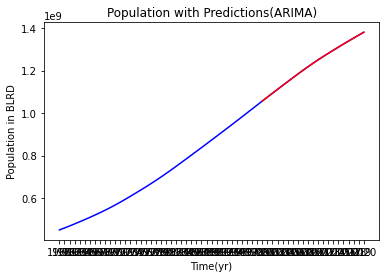

In [ ]:
pyplot.plot(year, X, color='blue')
pyplot.plot(year[size:len(X)],predictions, color='red')
plot.xlabel("Time(yr)")
plot.ylabel("Population in BLRD")
plot.title("Population with Predictions(ARIMA)")
pyplot.show()

In [ ]:
'''
#linear regression with gradient descent

def mean_squared_error(y_true, y_predicted):
     
    # Calculating the loss or cost
    cost = np.sum((y_true-y_predicted)**2) / len(y_true)
    return cost

def gradient_descent(x, y, iterations = 1000, learning_rate = 0.00001,
                     stopping_threshold = 1e9):
     
    # Initializing weight, bias, learning rate and iterations
    current_weight = 0.1
    current_bias = 0.1
    iterations = iterations
    learning_rate = learning_rate
    n = float(len(x))
     
    costs = []
    weights = []
    previous_cost = None
     
    # Estimation of optimal parameters
    for i in range(iterations):
         
        # Making predictions
        y_predicted = (current_weight * x) + current_bias
         
        # Calculationg the current cost
        current_cost = mean_squared_error(y, y_predicted)
 
        # If the change in cost is less than or equal to
        # stopping_threshold we stop the gradient descent
        if previous_cost and abs(previous_cost-current_cost)<=stopping_threshold:
            break
         
        previous_cost = current_cost
 
        costs.append(current_cost)
        weights.append(current_weight)
         
        # Calculating the gradients
        weight_derivative = -(2/n) * sum(x * (y-y_predicted))
        bias_derivative = -(2/n) * sum(y-y_predicted)
         
        # Updating weights and bias
        current_weight = current_weight - (learning_rate * weight_derivative)
        current_bias = current_bias - (learning_rate * bias_derivative)
                 
        # Printing the parameters for each 1000th iteration
        print(f"Iteration {i+1}: Cost {current_cost}, Weight \
        {current_weight}, Bias {current_bias}")
     
     
    # Visualizing the weights and cost at for all iterations
    plot.figure(figsize = (8,6))
    plot.plot(weights, costs)
    plot.scatter(weights, costs, marker='o', color='red')
    plot.title("Cost vs Weights")
    plot.ylabel("Cost")
    plot.xlabel("Weight")
    plot.show()
     
    return current_weight, current_bias
 
 
def gradient():
     
    # Data

    year = bd['year'].tolist()
    population = bd['population'].tolist()
    #print(type(year))
    #print(type(year[0]))
    #print(year)
    x = bd.iloc[:, 0].values.reshape(-1, 1)
    y = bd.iloc[:, 1].values.reshape(-1, 1)

    X = list()
    Y = list()
    for i in range(len(x)):
      X.append(int(x[i][0]))
      Y.append(y[i][0])

    X = np.array(X)
    Y = np.array(Y)
    print(X)
    print(Y)
 
    # Estimating weight and bias using gradient descent
    estimated_weight, eatimated_bias = gradient_descent(X, Y, iterations=500)
    print(f"Estimated Weight: {estimated_weight}\nEstimated Bias: {eatimated_bias}")
 
    # Making predictions using estimated parameters
    Y_pred = estimated_weight*X + eatimated_bias
 
    # Plotting the regression line
    plot.figure(figsize = (8,6))
    plot.scatter(X, Y, marker='o', color='red')
    plot.plot([min(X), max(X)], [min(Y_pred), max(Y_pred)], color='blue',markerfacecolor='red',
             markersize=10,linestyle='dashed')
    plot.title("The best fit line obtained using gradient descent")
    plot.xlabel("X")
    plot.ylabel("Y")
    plot.show()

gradient()
'''

'\n#linear regression with gradient descent\n\ndef mean_squared_error(y_true, y_predicted):\n     \n    # Calculating the loss or cost\n    cost = np.sum((y_true-y_predicted)**2) / len(y_true)\n    return cost\n\ndef gradient_descent(x, y, iterations = 1000, learning_rate = 0.00001,\n                     stopping_threshold = 1e9):\n     \n    # Initializing weight, bias, learning rate and iterations\n    current_weight = 0.1\n    current_bias = 0.1\n    iterations = iterations\n    learning_rate = learning_rate\n    n = float(len(x))\n     \n    costs = []\n    weights = []\n    previous_cost = None\n     \n    # Estimation of optimal parameters\n    for i in range(iterations):\n         \n        # Making predictions\n        y_predicted = (current_weight * x) + current_bias\n         \n        # Calculationg the current cost\n        current_cost = mean_squared_error(y, y_predicted)\n \n        # If the change in cost is less than or equal to\n        # stopping_threshold we stop the

In [ ]:
# Regression Model Metric w.r.t Dataset 1
population = bd['population'].tolist()

from sklearn import metrics

print("For Decision Tree Regressor")
print("R2 Score = ", metrics.r2_score(population, y_pred_dtr))
print('Mean Squared Error = ', metrics.mean_squared_error(population, y_pred_dtr))
print('Root Mean Squared Error = ', np.sqrt(metrics.mean_squared_error(population, y_pred_dtr)))
print('Mean Absolute Error = ', metrics.mean_absolute_error(population, y_pred_dtr))

print("\nFor Regression")
print("R2 Score = ", metrics.r2_score(population, y_pred_regression))
print("Mean Squared Error = ", metrics.mean_squared_error(population, y_pred_regression))
print("Root Mean Squared Error = ", np.sqrt(metrics.mean_squared_error(population, y_pred_regression)))
print("Mean Absolute Error = ", metrics.mean_absolute_error(population, y_pred_regression))

print("\nFor SVR")
print("R2 Score = ", metrics.r2_score(population, y_pred_svr))
print("Mean Squared Error = ", metrics.mean_squared_error(population, y_pred_svr))
print("Root Mean Squared Error = ", (metrics.mean_squared_error(population, y_pred_svr))**(0.5))
print("Mean Absolute Error = ", metrics.mean_absolute_error(population, y_pred_svr))

print("\nFor MLP")
print("R2 Score = ", metrics.r2_score(test_mlp, ypred))
print('Mean Squared Error = ', metrics.mean_squared_error(test_mlp, ypred))
print('Root Mean Squared Error = ', np.sqrt(metrics.mean_squared_error(test_mlp, ypred)))
print('Mean Absolute Error = ', metrics.mean_absolute_error(test_mlp, ypred))

print("\nFor Arima")
print("R2 Score = ", metrics.r2_score(test, predictions))
print('Mean Squared Error = ', metrics.mean_squared_error(test, predictions))
print('Root Mean Squared Error = ', np.sqrt(metrics.mean_squared_error(test, predictions)))
print('Mean Absolute Error = ', metrics.mean_absolute_error(test, predictions))

For Decision Tree Regressor
R2 Score =  0.9992824310358501
Mean Squared Error =  60591793652356.94
Root Mean Squared Error =  7784073.07599029
Mean Absolute Error =  3463566.5409836066

For Regression
R2 Score =  -9.354724018033759
Mean Squared Error =  8.743567968705441e+17
Root Mean Squared Error =  935070476.9537663
Mean Absolute Error =  888772429.2591368

For SVR
R2 Score =  -2.2013012574492246
Mean Squared Error =  2.703190841596628e+17
Root Mean Squared Error =  519922190.48590606
Mean Absolute Error =  431369000.09836066

For MLP
R2 Score =  0.9675250067588634
Mean Squared Error =  243746986492888.0
Root Mean Squared Error =  15612398.48623164
Mean Absolute Error =  13567318.111111112

For Arima
R2 Score =  0.9999999338927494
Mean Squared Error =  638551504.8856525
Root Mean Squared Error =  25269.576666134566
Mean Absolute Error =  19269.39165778387


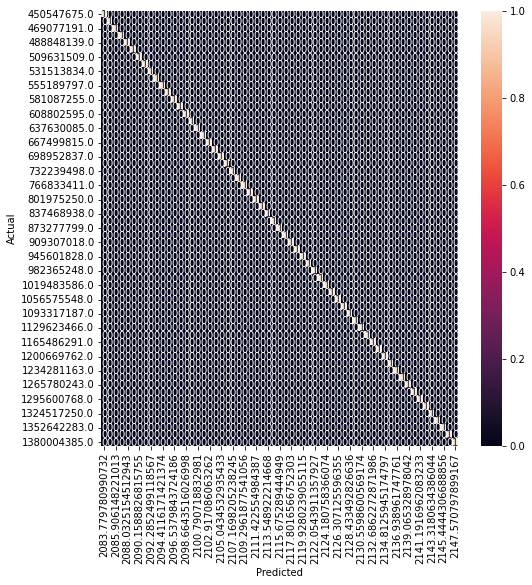

In [ ]:
# Confusion Matrix w.r.t Dataset 1

plot.figure(figsize = (8,8))
confusion_matrix = pd.crosstab(bd['population'], bd['Predicted(Regression)'], rownames=['Actual'], colnames=['Predicted'])
#print (confusion_matrix)
sns.heatmap(confusion_matrix, annot=True)
plot.show()

# **For Dataset 2**

In [ ]:
df2 = pd.read_csv('IndiaPopulation_2021.csv')
df2.head()
#df2.shape

,Year,Population,GrowthRate
0,2021,1393409038,0.97
1,2020,1380004385,0.99
2,2019,1366417754,1.02
3,2018,1352642280,1.04
4,2017,1338676785,1.07


In [ ]:
# Population prediction for 2029

x = df2.iloc[:, 0].values.reshape(-1, 1)
y = df2.iloc[:, 1].values.reshape(-1, 1)
model = LinearRegression().fit(x, y)
y_pred2 = model.predict([[2029]])
list(y_pred2[0])

[1499227703.2707787]

In [ ]:
# Preprocessing for Model scores -> List of Predicted Populations
# w.r.t Dataset 2

year = df2['Year'].tolist()
population = df2['Population'].tolist()
#print(type(year))
#print(type(year[0]))
#print(year)
x = df2.iloc[:, 0].values.reshape(-1, 1)
y = df2.iloc[:, 1].values.reshape(-1, 1)

model = LinearRegression().fit(x, y)

y_pred_regression = list()

for i in range(0,len(year)):
  k = model.predict([[int(year[i])]])
  y_pred_regression.append(k[0][0])
#print(y_pred)

df2['Predicted'] = y_pred_regression
df2.head()

,Year,Population,GrowthRate,Predicted
0,2021,1393409038,0.97,1.375952e+09
1,2020,1380004385,0.99,1.360543e+09
2,2019,1366417754,1.02,1.345133e+09
3,2018,1352642280,1.04,1.329724e+09
4,2017,1338676785,1.07,1.314315e+09


In [ ]:
# Regression Model Metric w.r.t Dataset 2

from sklearn import metrics

print("R2 Score = ", metrics.r2_score(population, y_pred_regression))
print("Mean Squared Error = ", metrics.mean_squared_error(population, y_pred_regression))
print("Root Mean Squared Error = ", np.sqrt(metrics.mean_squared_error(population, y_pred_regression)))
print("Mean Absolute Error = ", metrics.mean_absolute_error(population, y_pred_regression))   

R2 Score =  0.9885546101363997
Mean Squared Error =  1187416664707945.5
Root Mean Squared Error =  34458912.70350742
Mean Absolute Error =  29148652.309074137


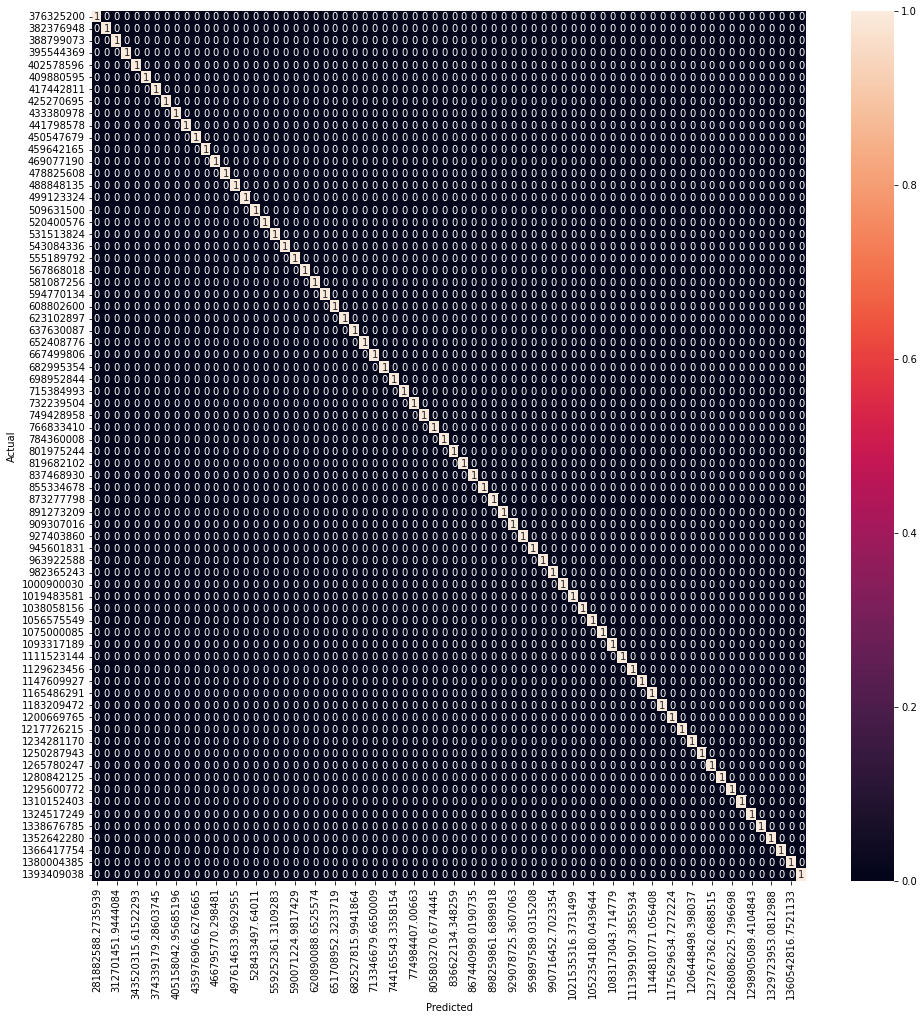

In [ ]:
# Confusion Matrix w.r.t Dataset 2

plot.figure(figsize = (16,16))
confusion_matrix = pd.crosstab(df2['Population'], df2['Predicted'], rownames=['Actual'], colnames=['Predicted'])
#print (confusion_matrix)
sns.heatmap(confusion_matrix, annot=True)
plot.show()

# **For Dataset 3**

In [ ]:
# Dataset 3
df3 = pd.read_csv('Countries Population from 1995 to 2020.csv')
b = df3.loc[df3['Country']=='India']
b.head()
#b.shape

,Year,Country,Population,Yearly % Change,Yearly Change,Migrants (net),Median Age,Fertility Rate,Density (P/Km²),Urban Pop %,Urban Population,Country's Share of World Pop %,World Population,Country Global Rank
18,2020,India,1380004385,0.99,13586631,-532687.0,28.4,2.24,464,35.0,483098640.0,17.70,7794798739,2
19,2019,India,1366417754,1.02,13775474,-532687.0,27.1,2.36,460,34.5,471828295.0,17.71,7713468100,2
20,2018,India,1352642280,1.04,13965495,-532687.0,27.1,2.36,455,34.1,460779764.0,17.73,7631091040,2
21,2017,India,1338676785,1.07,14159536,-532687.0,27.1,2.36,450,33.6,449963381.0,17.74,7547858925,2
22,2016,India,1324517249,1.10,14364846,-532687.0,27.1,2.36,445,33.2,439391699.0,17.75,7464022049,2


In [ ]:
# Population prediction for 2029

b.drop(['Country'],axis=1,inplace=True)
x = b.iloc[:, 0].values.reshape(-1, 1)
y = b.iloc[:, 1].values.reshape(-1, 1)
model = LinearRegression().fit(x, y)
y_pred2 = model.predict([[2029]])
list(y_pred2[0])
#b.head()

[1520515177.9394531]

In [ ]:
# Preprocessing for Model scores -> List of Predicted Populations
# w.r.t Dataset 3

year = b['Year'].tolist()
population = b['Population'].tolist()
#print(type(year))
#print(type(year[0]))
#print(year)
x = b.iloc[:, 0].values.reshape(-1, 1)
y = b.iloc[:, 1].values.reshape(-1, 1)
model = LinearRegression().fit(x, y)

y_pred = list()

for i in range(0,len(year)):
  k = model.predict([[int(year[i])]])
  y_pred.append(k[0][0])
#print(y_pred)

b['Predicted'] = y_pred
b.head()

,Year,Population,Yearly % Change,Yearly Change,Migrants (net),Median Age,Fertility Rate,Density (P/Km²),Urban Pop %,Urban Population,Country's Share of World Pop %,World Population,Country Global Rank,Predicted
18,2020,1380004385,0.99,13586631,-532687.0,28.4,2.24,464,35.0,483098640.0,17.70,7794798739,2,1.376974e+09
19,2019,1366417754,1.02,13775474,-532687.0,27.1,2.36,460,34.5,471828295.0,17.71,7713468100,2,1.361025e+09
20,2018,1352642280,1.04,13965495,-532687.0,27.1,2.36,455,34.1,460779764.0,17.73,7631091040,2,1.345076e+09
21,2017,1338676785,1.07,14159536,-532687.0,27.1,2.36,450,33.6,449963381.0,17.74,7547858925,2,1.329127e+09
22,2016,1324517249,1.10,14364846,-532687.0,27.1,2.36,445,33.2,439391699.0,17.75,7464022049,2,1.313178e+09


In [ ]:
# Regression Model Metric w.r.t Dataset 3

from sklearn import metrics

print("R2 Score = ", metrics.r2_score(population, y_pred))
print("Mean Squared Error = ", metrics.mean_squared_error(population, y_pred))
print("Root Mean Squared Error = ", np.sqrt(metrics.mean_squared_error(population, y_pred)))
print("Mean Absolute Error = ", metrics.mean_absolute_error(population, y_pred))

R2 Score =  0.9943987110626197
Mean Squared Error =  676018697469484.9
Root Mean Squared Error =  26000359.564234585
Mean Absolute Error =  19619957.73625946


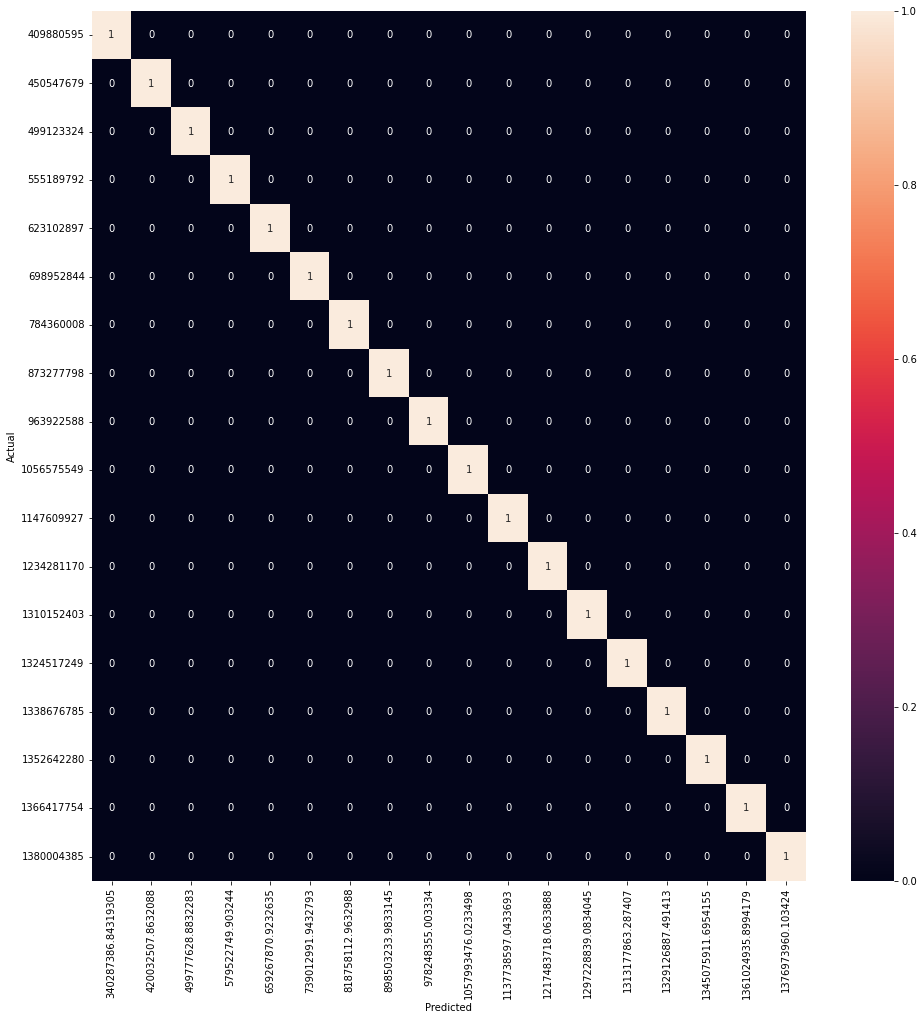

In [ ]:
# Confusion Matrix w.r.t Dataset 3

plot.figure(figsize = (16,16))
confusion_matrix = pd.crosstab(b['Population'], b['Predicted'], rownames=['Actual'], colnames=['Predicted'])
#print (confusion_matrix)
sns.heatmap(confusion_matrix, annot=True)
plot.show()

## **For Dataset 4**

In [ ]:
df4 = pd.read_csv('genderdata_India.csv')
df4.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,India,IND,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,103.921,104.093,104.265,104.7644,105.2638,105.7632,...,28.052,25.077,22.102,19.127,16.152,13.177,1.207080e+01,1.096460e+01,NaN,NaN
1,India,IND,Adults (ages 15+) and children (0-14 years) li...,SH.HIV.TOTL,NaN,NaN,NaN,NaN,NaN,NaN,...,2600000.000,2500000.000,2500000.000,2400000.000,2400000.000,2400000.000,2.400000e+06,2.300000e+06,2300000.0,NaN
2,India,IND,Adults (ages 15+) and children (ages 0-14) new...,SH.HIV.INCD.TL,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,India,IND,Adults (ages 15+) living with HIV,SH.DYN.AIDS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,India,IND,Adults (ages 15-49) newly infected with HIV,SH.HIV.INCD,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Extracting the Total Population metric

b2_pop=df4.loc[df4['Indicator Name']=='Population, total']
b2_pop.drop(['Country Name','Country Code','Indicator Name','Indicator Code'],axis=1,inplace=True)
b2_pop = b2_pop.T
b2_pop.dropna(inplace=True)
b2_pop=b2_pop.reset_index().rename(columns={'index':'year',327:'population'})
b2_pop.head()

,year,population
0,1960,450547675.0
1,1961,459642166.0
2,1962,469077191.0
3,1963,478825602.0
4,1964,488848139.0


In [ ]:
# Population Prediction
x = b2_pop.iloc[:, 0].values.reshape(-1, 1)
y = b2_pop.iloc[:, 1].values.reshape(-1, 1)
model = LinearRegression().fit(x, y)
y_pred = model.predict([[2040]])
list(y_pred[0])

[1712260499.1464844]

In [ ]:
# Preprocessing for Model scores -> List of Predicted Populations
# w.r.t Dataset 4

year = b2_pop['year'].tolist()
population = b2_pop['population'].tolist()
#print(type(year))
#print(type(year[0]))
#print(year)
x = b2_pop.iloc[:, 0].values.reshape(-1, 1)
y = b2_pop.iloc[:, 1].values.reshape(-1, 1)
model = LinearRegression().fit(x, y)

y_pred = list()

for i in range(0,len(year)):
  k = model.predict([[int(year[i])]])
  y_pred.append(k[0][0])
#print(y_pred)

b2_pop['Predicted'] = y_pred
b2_pop.head()

,year,population,Predicted
0,1960,450547675.0,3.946830e+08
1,1961,459642166.0,4.111527e+08
2,1962,469077191.0,4.276224e+08
3,1963,478825602.0,4.440921e+08
4,1964,488848139.0,4.605618e+08


In [ ]:
# Regression Model Metric w.r.t Dataset 4

from sklearn import metrics

print("R2 Score = ", metrics.r2_score(population, y_pred))
print("Mean Squared Error = ", metrics.mean_squared_error(population, y_pred))
print("Root Mean Squared Error = ", np.sqrt(metrics.mean_squared_error(population, y_pred)))
print("Mean Absolute Error = ", metrics.mean_absolute_error(population, y_pred))

R2 Score =  0.9958270409466874
Mean Squared Error =  352366234481173.1
Root Mean Squared Error =  18771420.683612976
Mean Absolute Error =  15247274.259084107


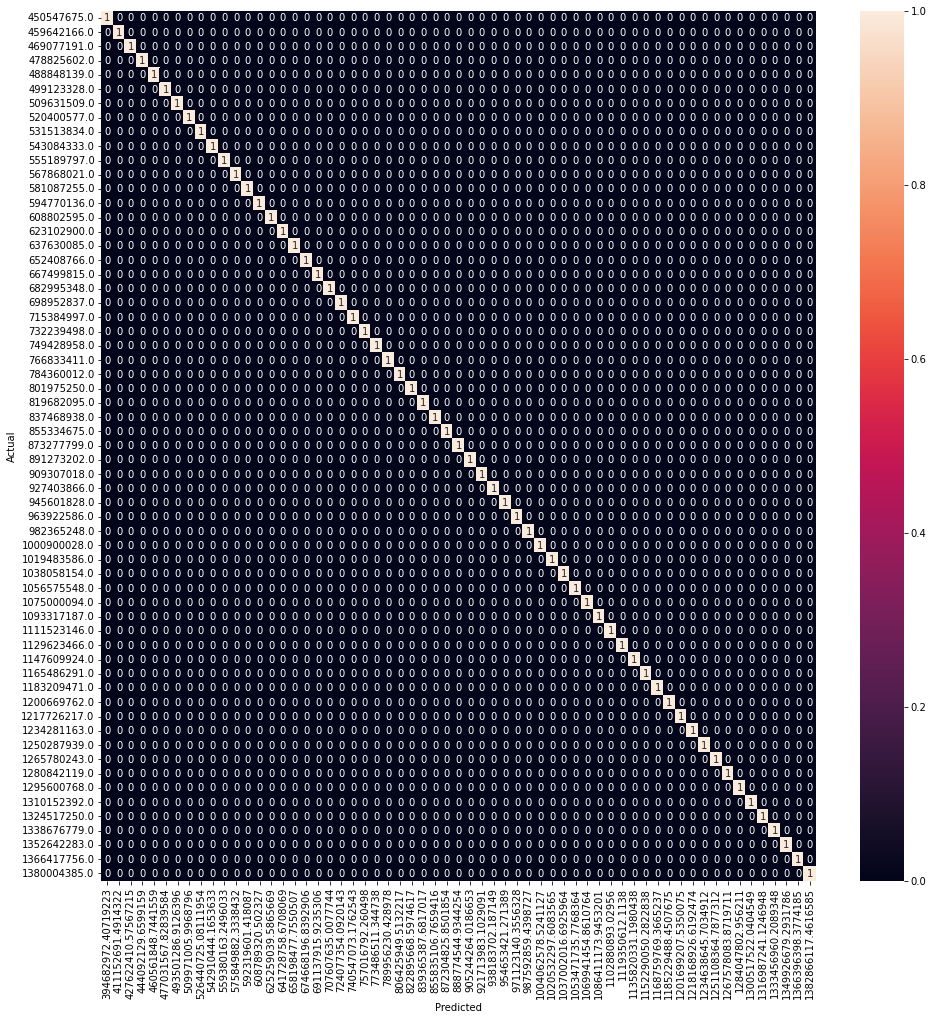

In [ ]:
# Confusion Matrix w.r.t Dataset 3

plot.figure(figsize = (16,16))
confusion_matrix = pd.crosstab(b2_pop['population'], b2_pop['Predicted'], rownames=['Actual'], colnames=['Predicted'])
#print (confusion_matrix)
sns.heatmap(confusion_matrix, annot=True)
plot.show()

# **Visualizations**

## **Dataset 1**

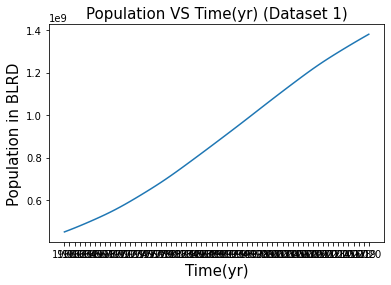

In [ ]:
# Propulation Growth

year = bd['year']
population = bd['population']

# Figure Size
#fig = plot.figure(figsize =(15, 10))
 
# Scatter  Plot
plot.plot(year, population)

# Bar Graph
#plot.bar(year, population)
# Scatter Plot
#plot.scatter(year2, population2)
plot.title('Population VS Time(yr) (Dataset 1)', fontsize = 15)
plot.xlabel('Time(yr)', fontsize = 15)
plot.ylabel('Population in BLRD', fontsize = 15)
# Show Plot
plot.show()

## **Dataset 2**

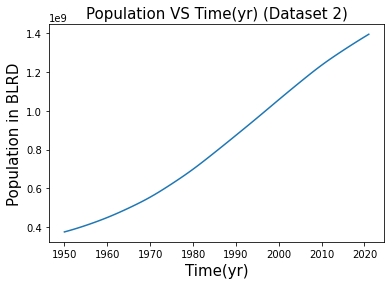

In [ ]:
# Propulation Growth

year2 = df2['Year']
population2 = df2['Population']
growth2 = df2['GrowthRate']

# Figure Size
#fig = plot.figure(figsize =(15, 10))
 
# Scatter Plot
plot.plot(year2, population2)
# Bar Graph 
#plot.bar(year, population)
plot.title('Population VS Time(yr) (Dataset 2)', fontsize = 15)
plot.xlabel('Time(yr)', fontsize = 15)
plot.ylabel('Population in BLRD', fontsize = 15)
# Show Plot
plot.show()

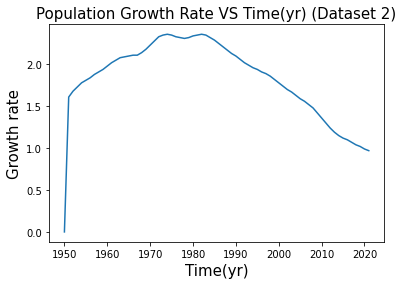

In [ ]:
# Growth Rate
#fig = plot.figure(figsize =(15, 10))
plot.plot(year2, growth2)
plot.title('Population Growth Rate VS Time(yr) (Dataset 2)', fontsize = 15)
plot.xlabel('Time(yr)', fontsize = 15)
plot.ylabel('Growth rate', fontsize = 15)
plot.show()

## **Dataset 3**

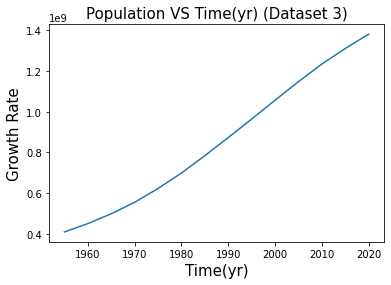

In [ ]:
# Propulation Growth
#fig = plot.figure(figsize =(15, 10))
year3 = b['Year']
population3 = b['Population']
growth3 = b['Yearly % Change']
grow3 = b['Yearly Change']
fertility3 = b['Fertility Rate'] 
med_age = b['Median Age']
pop_den = b['Density (P/Km²)']

plot.plot(year3, population3)
plot.title('Population VS Time(yr) (Dataset 3)', fontsize = 15)
plot.xlabel('Time(yr)', fontsize = 15)
plot.ylabel('Growth Rate', fontsize = 15)
plot.show()

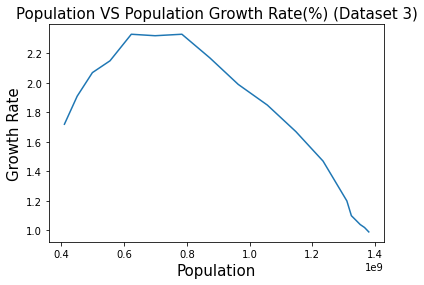

In [ ]:
plot.plot(population3,growth3)
plot.title('Population VS Population Growth Rate(%) (Dataset 3)', fontsize = 15)
plot.xlabel('Population', fontsize = 15)
plot.ylabel('Growth Rate', fontsize = 15)
plot.show()

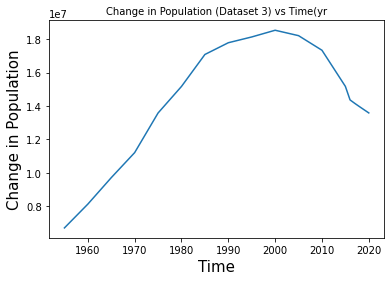

In [ ]:
plot.plot(year3,grow3)
plot.title('Change in Population (Dataset 3) vs Time(yr', fontsize = 10)
plot.xlabel('Time', fontsize = 15)
plot.ylabel('Change in Population', fontsize = 15)
plot.show()

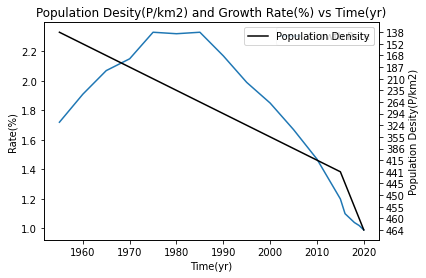

In [ ]:
# Population Desity(P/km2) and Growth Rate(%) vs Time(yr)
fig, ax1 = plot.subplots()
plot.title('Population Desity(P/km2) and Growth Rate(%) vs Time(yr)', fontsize = 12)
ax1.plot(year3, growth3, label = 'Growth Rate')
ax1.legend(loc=0)
ax1.set_xlabel("Time(yr)")
ax1.set_ylabel("Rate(%)")
ax2 = ax1.twinx()
ax2.plot(year3,pop_den, color = 'black', label = 'Population Density')

ax2.legend(loc=0)
ax2.set_ylabel("Population Desity(P/km2)")

plot.show()

# **Inference 1**

## *How does population density affect growth rate?*

In most mathematical models of populations whose changes resemble those of actual populations, the growth rate is a decreasing function of density, meaning that as the population increases the growth rate decreases and vice versa.

The density of population in India (2011) is 382 persons per sq km. There has been a steady increase of more than 200 persons per sq km over the last 50 years as the density of population increased from 117 persons/ sq km in 1951 to 382 persons/sq km in 2011.

The graph clearly shows the above phenomenon. With increasing population density, especially in the urban areas (demonstrated in the later sections), the growth rate is significantly reduced. 

Additional Reference: https://www.worldbank.org/en/topic/urbandevelopment/publication/demographic-trends-and-urbanization 

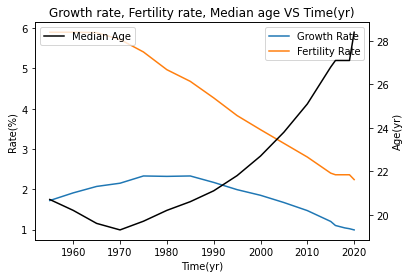

In [ ]:
# Trend in Growth and Fertility Rate
fig, ax1 = plot.subplots()
plot.title('Growth rate, Fertility rate, Median age VS Time(yr)', fontsize = 12)
#plot.figure(figsize =(15, 10))
ax1.plot(year3, growth3, label = 'Growth Rate')
ax1.plot(year3, fertility3, label = 'Fertility Rate')

ax1.legend(loc=0)
ax1.set_xlabel("Time(yr)")
ax1.set_ylabel("Rate(%)")

ax2 = ax1.twinx()
ax2.plot(year3,med_age, color = 'black', label = 'Median Age')

ax2.legend(loc=0)
ax2.set_ylabel("Age(yr)")

plot.show()

# **Inference 2**

The Indian populaion has shown a sharp dip in it's yearly Population Growth rate. This effect is the direct result of the regular and systematic awareness programmes on population explosion and population and birth control; increased incentive to smaller families and also some of the well known campaigns such as the "Hum Do Humare Do" Campaign. 

The yearly growth rate has shown significant reduction, owinf to the lowered fertility rate. Although the overall population has been increasing, the overall rate of increase has almost come to an asymptotic maxima. 

The Lowered fertility rate is not a biological/physiological problem in the population, but rather an informed abstinance by the members of the popuation, towards increasing the population unhindered.

This overall reduction in growth is not credited to a hypothetical factor like an increased motality/infact mortality rate. This can be proved by the Median age vs Time(in years) graph which clearly shows that the Median age has been increasing over time, which aims towards more people living upto an older age an lesser population in the younger age groups.

_______________________________________________________________________________

Until 2050, the IHME(Institute for Health Metrics and Evaluation) projections are almost identical to widely-used United Nations projections. The UN (https://bit.ly/2PGYALh) projects that India’s population will be 1.64 billion by 2050, the IHME projects 1.61 billion by 2048. It is only in the second half of the century that the two projections diverge with the UN predicting a population of 1.45 billion by 2100, and the IHME, 1.09 billion.

Part of this divergence may come from IHME model’s excessive reliance on data regarding current contraceptive use in the National Family Health Survey (NFHS) and potential for increasing contraceptive use. Research at the National Council of Applied Economic Research (NCAER) National Data Innovation Centre by Santanu Pramanik and colleagues shows that contraceptive use in the NFHS is poorly estimated, and as a result, unmet need for contraception may be lower than that estimated by the IHME model, generating implausibly low fertility projections for 2100.

# **Fertility Decline**
Regardless of whether we subscribe to the UN’s projections, or the IHME projections, India’s demographic future contains a peaking and subsequently declining population driven by a sharp reduction in fertility. In the 1950s, India’s Total fertility rate (TFR) was nearly six children per woman; today it is 2.2. Ironically, the massive push for family planning coupled with forced sterilisation during the Emergency barely led to a 17% decline in TFR from 5.9 in 1960 to 4.9 in 1980. However, between 1992 and 2015, it had fallen by 35% from 3.4 to 2.2.

Source: https://www.thehindu.com/opinion/lead/indias-population-data-and-a-tale-of-two-projections/article32329243.ece

Additional Sources:
Gender data:
*   https://www.populationpyramid.net/india/1950/
*   https://ourworldindata.org/sex-ratio-at-birth
*   https://population.un.org/wpp/Publications/Files/WPP2019_Methodological-updates.pdf
*   https://www.macrotrends.net/countries/IND/india/population-density
*   https://datacatalog.worldbank.org/search/dataset/0037652
*   https://www.populationpyramid.net/hnp/population-male-of-total/2015/



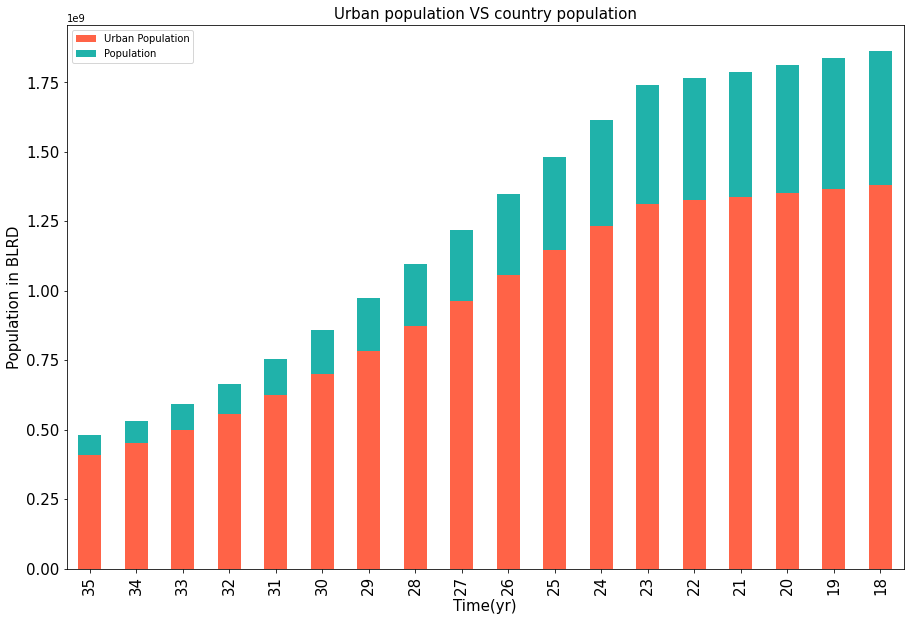

In [ ]:
# Total Population vs Urban Population

b[['Population','Urban Population']].sort_values('Population', ascending = True).plot.bar(stacked=True, color = ['tomato','lightseagreen'],figsize = (15,10), fontsize = 15)
plot.title('Urban population VS country population', fontsize = 15)
plot.xlabel('Time(yr)', fontsize = 15)
plot.ylabel('Population in BLRD', fontsize = 15)
plot.legend(['Urban Population','Population'])
plot.show()

In [ ]:
# Curve Fitting the Growth rate Curve

year = list(year3)
growth = list(population3)
year.reverse()
growth.reverse()
x = list()
for i in range(0,len(year3)):
  x.append(year[i]-1955)
y = list(growth)


from scipy.optimize import curve_fit
def sigmoid(x, L ,x0, k, b):
    y = L / (1 + np.exp(-k*(x-x0))) + b
    return (y)

p0 = [max(y), np.median(x),1,min(y)] # this is an mandatory initial guess

popt, pcov = curve_fit(sigmoid, x, y,p0, method='lm')

Text(0, 0.5, 'Population')

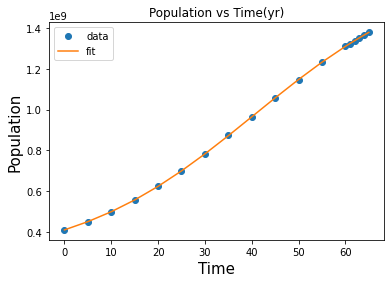

In [ ]:
ydata = sigmoid(x, *popt)

plot.plot(x, y, 'o', label='data')
plot.plot(x,ydata, label='fit')
plot.legend(loc='best')
plot.title('Population vs Time(yr)', fontsize = 12)
plot.xlabel('Time', fontsize = 15)
plot.ylabel('Population', fontsize = 15)

In [ ]:
print(ydata)

[4.09652073e+08 4.50154413e+08 4.98919704e+08 5.56624331e+08
 6.23522329e+08 6.99260957e+08 7.82740636e+08 8.72077500e+08
 9.64714026e+08 1.05768292e+09 1.14797440e+09 1.23291464e+09
 1.31045824e+09 1.32495347e+09 1.33909314e+09 1.35287213e+09
 1.36628654e+09 1.37933357e+09]


Text(0, 0.5, 'Population Growth')

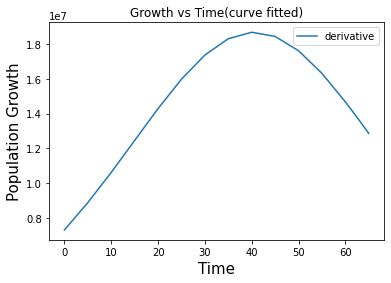

In [ ]:
ydata= list(ydata)
list(popt)
L = popt[0]
x0 = popt[1]
k = popt[2]
b = popt[3]
ydif = list()
for i in range(0,len(ydata)):
  num1 = k*(ydata[i]-b)
  num2 = (L-ydata[i]+b)/L
  num = num1*num2 
  ydif.append(abs(num))

#plot.plot(x,ydata, label='fit')
plot.plot(x,ydif, label='derivative')
plot.legend(loc='best')
plot.title('Growth vs Time(curve fitted)', fontsize = 12)
plot.xlabel('Time', fontsize = 15)
plot.ylabel('Population Growth', fontsize = 15)

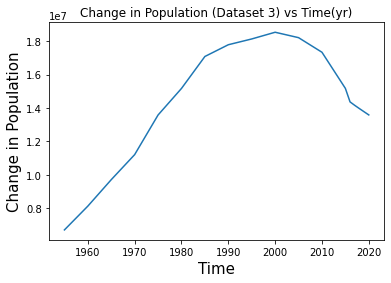

In [ ]:
plot.plot(year3,grow3)
plot.title('Change in Population (Dataset 3) vs Time(yr)', fontsize = 12)
plot.xlabel('Time', fontsize = 15)
plot.ylabel('Change in Population', fontsize = 15)
plot.show()

In [ ]:
from scipy import optimize
def f(x): return 249491795+(1450746330/(1+np.exp(-0.0514671663*(x-40.5438418))))
max_x = optimize.fmin(lambda x: -f(x), 0)
print(max_x)

Optimization terminated successfully.
         Current function value: -1700238125.000000
         Iterations: 44
         Function evaluations: 109
[786.43175]


In [ ]:
max_x = optimize.minimize_scalar(lambda x: -f(x))
max_x

     fun: -1700238125.0
    nfev: 53
     nit: 35
 success: True
       x: 1340.3567622018152

## **Dataset 4**

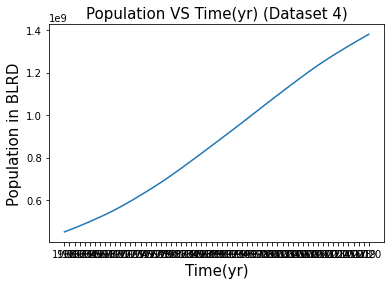

In [ ]:
# Propulation Growth

year4 = b2_pop['year']
population4 = b2_pop['population']

# Figure Size
#fig = plot.figure(figsize =(15, 10))
 
# Scatter  Plot
plot.plot(year4, population4)

# Bar Graph
#plot.bar(year, population)
# Scatter Plot
#plot.scatter(year2, population2)
plot.title('Population VS Time(yr) (Dataset 4)', fontsize = 15)
plot.xlabel('Time(yr)', fontsize = 15)
plot.ylabel('Population in BLRD', fontsize = 15)
# Show Plot
plot.show()

# **Inference 3**

All four datasets though sourced from 3 different organizations namely, Kaggle, World Bank and The Indian Government Census Department, show a rather similar population graph over time, to the extent that even the estimated population for a particular year based on all 3 datasets lie within a close range of each other.  

In [ ]:
# Extracting the Total Gender metrics

b2_fp =df4.loc[df4['Indicator Name']=='Population, female (% of total population)']
b2_f =df4.loc[df4['Indicator Name']=='Population, female']
b2_mp =df4.loc[df4['Indicator Name']=='Population, male (% of total population)']
b2_m =df4.loc[df4['Indicator Name']=='Population, male']

b2_fp.drop(['Country Name','Country Code','Indicator Name','Indicator Code'],axis=1,inplace=True)
b2_f.drop(['Country Name','Country Code','Indicator Name','Indicator Code',],axis=1,inplace=True)
b2_mp.drop(['Country Name','Country Code','Indicator Name','Indicator Code'],axis=1,inplace=True)
b2_m.drop(['Country Name','Country Code','Indicator Name','Indicator Code'],axis=1,inplace=True)



b2_fp = b2_fp.T
b2_f = b2_f.T
b2_mp = b2_mp.T
b2_m = b2_m.T

b2_fp.dropna(inplace=True)
b2_f.dropna(inplace=True)
b2_mp.dropna(inplace=True)
b2_m.dropna(inplace=True)

b2_fp = b2_fp.reset_index().rename(columns={'index':'year',324:'Female(%)'})
b2_f = b2_f.reset_index().rename(columns={'index':'year',323:'Female Population'})
b2_mp = b2_mp.reset_index().rename(columns={'index':'year',326:'Male(%)'})
b2_m = b2_m.reset_index().rename(columns={'index':'year',325:'Male Population'})

In [ ]:
result = pd.concat([b2_fp, b2_f, b2_mp, b2_m], axis=1, join="inner")
result.head()

,year,Female(%),year,Female Population,year,Male(%),year,Male Population
0,1960,48.395086,1960,218042936.0,1960,51.604914,1960,232504739.0
1,1961,48.369963,1961,222328744.0,1961,51.630037,1961,237313422.0
2,1962,48.346144,1962,226780736.0,1962,51.653856,1962,242296455.0
3,1963,48.323898,1963,231387194.0,1963,51.676102,1963,247438408.0
4,1964,48.303512,1964,236130821.0,1964,51.696488,1964,252717318.0


<class 'pandas.core.frame.DataFrame'>


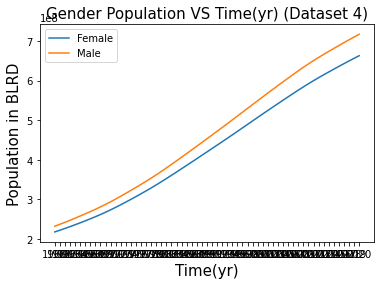

In [ ]:
# Pyramid Chart Line Graph

year = result['year']
female = result['Female Population'].to_frame()
male = result['Male Population'].to_frame()
femalep = result['Female(%)'].to_frame()
malep = result['Male(%)'].to_frame()

# Figure Size
#fig = plot.figure(figsize =(15, 10))
print(type(female))

plot.plot(year4,female)
plot.plot(year4,male)
# Bar Graph
#plot.bar(year, population)
# Scatter Plot
#plot.scatter(year2, population2)
plot.title('Gender Population VS Time(yr) (Dataset 4)', fontsize = 15)
plot.legend(['Female','Male'])
plot.xlabel('Time(yr)', fontsize = 15)
plot.ylabel('Population in BLRD', fontsize = 15)
# Show Plot
plot.show()

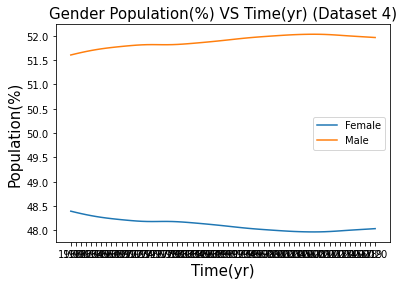

In [ ]:
# Gender Population(%) vs Time(yr)
plot.plot(year4,femalep)
plot.plot(year4,malep)
# Bar Graph
#plot.bar(year, population)
# Scatter Plot
#plot.scatter(year2, population2)
plot.title('Gender Population(%) VS Time(yr) (Dataset 4)', fontsize = 15)
plot.legend(['Female','Male'])
plot.xlabel('Time(yr)', fontsize = 15)
plot.ylabel('Population(%)', fontsize = 15)
# Show Plot
plot.show()

In [ ]:
# Pyramid
# convert male counts to negative
#result.loc[result.Gender.eq('male'), 'Count'] = df.Count.mul(-1)

# plot
#sns.barplot(data=df, x='Count', y='Age', hue='Gender', orient='horizontal', dodge=False)

**IMPORTANT**: Since population keeps increasing, training any model, would give the same result as to increasing population with time. However, if you take into consideration the lowering of the fertility rate, we can essentially find the population maxima and show that the Human population would form a sigmoid curve just like any other population. 

# Compare:
* Birth Rate
* Death Rate
* Infant Mortality Rate
* Fertility Rate

**(not done yet)**

# Population Prediction Models to be used:
*  Linear Regression **(done)**
*  SMOreg (SVG for Linear Regression)
*  MLP
*  Decision Tree

# **To-Be-Done**

* Make a better implementation of the linear regression model
* Fix the overfitting problem of the SVR
* calculate the same metrics for all datasets
* Prepare growth curve based on various models on the 4 datasets (stacked area graph)

# **Plan of Action:**

Apply bivariate regression analysis and curve fitting on the growth rate data and find the function.
* https://machinelearningmastery.com/curve-fitting-with-python/

* https://towardsdatascience.com/watching-machine-learning-models-fitting-a-curve-c594fec4bbdb

* https://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.1053.7606&rep=rep1&type=pdf


Now integrate this function to get the population interpolation curve.

Plot it and try to get the sigmoid curve

Find the max population to be reached and the stagnation population

249491795+(1450746330/(1+e^(-0.0514671663(x-40.5438418))))

* https://stackoverflow.com/questions/51321100/python-natural-smoothing-splines
* https://stackoverflow.com/questions/55725139/fit-sigmoid-function-s-shape-curve-to-data-using-python
* https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html
* https://towardsdatascience.com/derivative-of-the-sigmoid-function-536880cf918e
